# Importando Bibliotecas

In [2]:
import pandas as pd
import seaborn as srn
import statistics as sts

# Importando Dados

In [4]:
dataset = pd.read_csv("Churn.csv", sep=";")
dataset.head()
dataset.shape


(999, 12)

# Primeiro problema é dar nomes as colunas


In [6]:
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo",
                   "Produtos","TemCartCredito",
                    "Ativo","Salario","Saiu"]

# Visulizar

In [ ]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


# Explorar dados categoricos


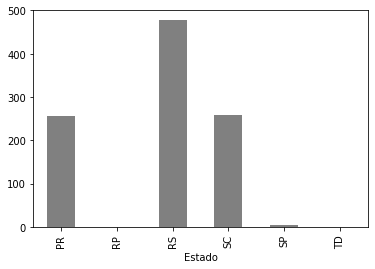

In [7]:
#Estado
agrupado = dataset.groupby(['Estado']).size()
agrupado
agrupado.plot.bar(color='gray')

In [ ]:
#Genero
agrupado = dataset.groupby(['Genero']).size()
agrupado
agrupado.plot.bar(color='gray')

In [ ]:
agrupado = dataset.groupby(['Temperatura']).size()
agrupado
dataset.loc[dataset['Temperatura'] < -100 or dataset['Temperatura'] > 100]
#substituir valores
mediana = sts.median(dataset['Temperatura'])
mediana
dataset.loc[dataset['Temperatura'] < -100 or dataset['Temperatura'] > 100, 'Temperatura'] = mediana

# Explorar colunas numéricas

In [ ]:
#Score
dataset['Score'].describe()
srn.boxplot(dataset['Score']).set_title('Score')
srn.distplot(dataset['Score']).set_title('Score')


In [ ]:
#Idade
dataset['Idade'].describe()
srn.boxplot(dataset['Idade']).set_title('Idade')
srn.distplot(dataset['Idade']).set_title('Idade')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Saldo')

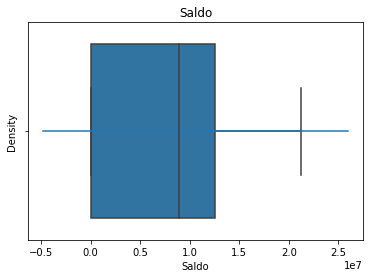

In [15]:
#Saldo
dataset['Saldo'].describe()
srn.boxplot(dataset['Saldo']).set_title('Saldo')
srn.distplot(dataset['Saldo']).set_title('Saldo')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Salario')

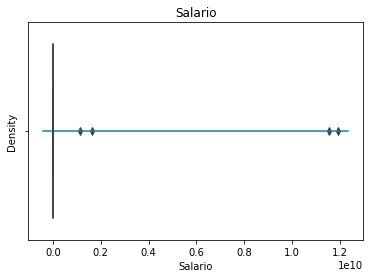

In [14]:
#Salário
dataset['Salario'].describe()
srn.boxplot(dataset['Salario']).set_title('Salario')
srn.distplot(dataset['Salario']).set_title('Salario')

# Contamos valores NAN

In [ ]:
#genero e salário
dataset.isnull().sum()

# Remover NAs e substiutir pela mediana

In [16]:
#salarios
dataset['Salario'].describe()
mediana = sts.median(dataset['Salario'])
mediana

73752.0

In [17]:
#substituir NAN por mediana
dataset['Salario'].fillna(mediana, inplace=True)

In [18]:
#Verificamos se NAN não existem mais
dataset['Salario'].isnull().sum()

0

# Genero, falta de padronização e NAs

In [19]:
agrupado = dataset.groupby(['Genero']).size()
print(agrupado)

Genero
F              2
Fem            1
Feminino     460
M              6
Masculino    521
dtype: int64


In [20]:
#total de Nas
dataset['Genero'].isnull().sum()

8

In [21]:
#preenche NAs com Masculino (moda)
dataset['Genero'].fillna('Masculino', inplace=True)


In [22]:
#verificamos novamente NANs
dataset['Genero'].isnull().sum()

0

In [ ]:
#padroniza de acordo com o dominio
dataset.loc[dataset['Genero'] ==  'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin( ['Fem','F']), 'Genero'] = "Feminino"
#visualiza o resultado
agrupado = dataset.groupby(['Genero']).size()
agrupado

# Padroniza de acordo com o dominio

In [ ]:
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin(['Fem', 'F']), 'Genero'] = "Feminino"

In [ ]:
#visualiza o resultado
agrupado = dataset.groupby(['Genero']).size()
agrupado

# Idades fora do dominio

In [ ]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [ ]:
#visualizar
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [ ]:
#calular a mediana
mediana = sts.median(dataset['Idade'])
print(mediana)

37


In [ ]:
#substituir
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120), 'Idade'] = mediana

In [ ]:
#verificamos se ainda existem idades fora do domínio
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

#Dados duplicados, buscamos pelo ID

In [8]:
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [9]:
#excluimso pelo ID
dataset.drop_duplicates(subset="Id", keep='first',inplace=True)
#buscamos duplicados 
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


#Estado foram do domínio

In [ ]:
agrupado = dataset.groupby(['Estado']).size()
agrupado

In [ ]:
#atribuomos RS (moda)
dataset.loc[dataset['Estado'].isin( ['RP','SP','TD']), 'Estado'] = "RS"
agrupado = dataset.groupby(['Estado']).size()

In [ ]:
#verificamos o resultado
agrupado

#Outliers em salário, vamos considerar 2 desvios padrão

In [10]:
desv = sts.stdev(dataset['Salario'])
desv

nan

In [11]:
#definir padrão como maior que 2 desvios padrão
#checamos se algum atende critério
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [12]:
#vamos atualiar salarios para mediana, calculamos
mediana = sts.median(dataset['Salario'])
print(mediana)

73752.0


In [13]:
#atribumos
dataset.loc[dataset['Salario'] >=  2 * desv, 'Salario'] = mediana
#checamos se algum atende critério
dataset.loc[dataset['Salario'] >=  2 * desv ]
dataset.head()
dataset.shape

(998, 12)